In [452]:
import numpy as np 
import pandas as pd 
import yfinance as yf 
import matplotlib.pyplot as plt
#import cpi
#cpi.update()
from datetime import date
import mplfinance as mpf

today = date.today()


In [453]:
symbol = 'AAPL' 
start_date = '2021-01-01' 
end_date = today 
data = yf.download(symbol, start=start_date, end=end_date)

[*********************100%***********************]  1 of 1 completed


In [454]:
data['SMA_50'] = data['Close'].rolling(window=50).mean()
data['SMA_200'] = data['Close'].rolling(window=200).mean()
def calculate_ema(prices, period):
    alpha = 2 / (period + 1)
    return prices.ewm(alpha=alpha, adjust=False).mean()

# Assuming df is a DataFrame with a datetime index and a 'Close' column.
# df = pd.read_csv('your_stock_data.csv')  # This is just an example. Adjust as needed.

data['50_day_EMA'] = calculate_ema(data['Close'], period=50)
data['200_day_EMA'] = calculate_ema(data['Close'], period=200)

data


,Open,High,Low,Close,Adj Close,Volume,SMA_50,SMA_200,50_day_EMA,200_day_EMA
Date,,,,,,,,,,
2021-01-04,133.520004,133.610001,126.760002,129.410004,127.331703,143301900,NaN,NaN,129.410004,129.410004
2021-01-05,128.889999,131.740005,128.429993,131.009995,128.906006,97664900,NaN,NaN,129.472748,129.425924
2021-01-06,127.720001,131.050003,126.379997,126.599998,124.566818,155088000,NaN,NaN,129.360092,129.397805
2021-01-07,128.360001,131.630005,127.860001,130.919998,128.817429,109578200,NaN,NaN,129.421264,129.412952
2021-01-08,132.429993,132.630005,130.229996,132.050003,129.929306,105158200,NaN,NaN,129.524352,129.439191
...,...,...,...,...,...,...,...,...,...,...
2023-09-06,188.399994,188.850006,181.470001,182.910004,182.910004,81755800,186.7220,163.77565,183.344828,170.428192
2023-09-07,175.179993,178.210007,173.539993,177.559998,177.559998,112488800,186.5120,163.90985,183.117972,170.499156
2023-09-08,178.350006,180.240005,177.789993,178.179993,178.179993,65551300,186.2906,164.04430,182.924326,170.575582


In [455]:
data['Signal'] = np.where(data['SMA_200'] < data['SMA_50'], 1, 0)
data

,Open,High,Low,Close,Adj Close,Volume,SMA_50,SMA_200,50_day_EMA,200_day_EMA,Signal
Date,,,,,,,,,,,
2021-01-04,133.520004,133.610001,126.760002,129.410004,127.331703,143301900,NaN,NaN,129.410004,129.410004,0
2021-01-05,128.889999,131.740005,128.429993,131.009995,128.906006,97664900,NaN,NaN,129.472748,129.425924,0
2021-01-06,127.720001,131.050003,126.379997,126.599998,124.566818,155088000,NaN,NaN,129.360092,129.397805,0
2021-01-07,128.360001,131.630005,127.860001,130.919998,128.817429,109578200,NaN,NaN,129.421264,129.412952,0
2021-01-08,132.429993,132.630005,130.229996,132.050003,129.929306,105158200,NaN,NaN,129.524352,129.439191,0
...,...,...,...,...,...,...,...,...,...,...,...
2023-09-06,188.399994,188.850006,181.470001,182.910004,182.910004,81755800,186.7220,163.77565,183.344828,170.428192,1
2023-09-07,175.179993,178.210007,173.539993,177.559998,177.559998,112488800,186.5120,163.90985,183.117972,170.499156,1
2023-09-08,178.350006,180.240005,177.789993,178.179993,178.179993,65551300,186.2906,164.04430,182.924326,170.575582,1


In [456]:
data['Daily_Return'] = data['Close'].pct_change() 
data['Strategy_Return'] = data['Daily_Return'] * data['Signal'].shift(1) 
data['Cumulative_Return'] = (1 + data['Strategy_Return']).cumprod()
data

,Open,High,Low,Close,Adj Close,Volume,SMA_50,SMA_200,50_day_EMA,200_day_EMA,Signal,Daily_Return,Strategy_Return,Cumulative_Return
Date,,,,,,,,,,,,,,
2021-01-04,133.520004,133.610001,126.760002,129.410004,127.331703,143301900,NaN,NaN,129.410004,129.410004,0,NaN,NaN,NaN
2021-01-05,128.889999,131.740005,128.429993,131.009995,128.906006,97664900,NaN,NaN,129.472748,129.425924,0,0.012364,0.000000,1.000000
2021-01-06,127.720001,131.050003,126.379997,126.599998,124.566818,155088000,NaN,NaN,129.360092,129.397805,0,-0.033662,-0.000000,1.000000
2021-01-07,128.360001,131.630005,127.860001,130.919998,128.817429,109578200,NaN,NaN,129.421264,129.412952,0,0.034123,0.000000,1.000000
2021-01-08,132.429993,132.630005,130.229996,132.050003,129.929306,105158200,NaN,NaN,129.524352,129.439191,0,0.008631,0.000000,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-09-06,188.399994,188.850006,181.470001,182.910004,182.910004,81755800,186.7220,163.77565,183.344828,170.428192,1,-0.035793,-0.035793,1.053006
2023-09-07,175.179993,178.210007,173.539993,177.559998,177.559998,112488800,186.5120,163.90985,183.117972,170.499156,1,-0.029249,-0.029249,1.022206
2023-09-08,178.350006,180.240005,177.789993,178.179993,178.179993,65551300,186.2906,164.04430,182.924326,170.575582,1,0.003492,0.003492,1.025775


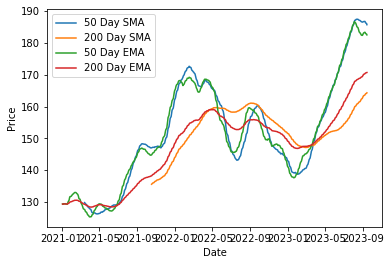

In [457]:
#plt.figure(dpi=200)
plt.plot(data.index, data['SMA_50'], label='50 Day SMA') 
plt.plot(data.index, data['SMA_200'], label='200 Day SMA')
plt.plot(data.index, data['50_day_EMA'], label='50 Day EMA') 
plt.plot(data.index, data['200_day_EMA'], label='200 Day EMA')
plt.xlabel('Date') 
plt.ylabel('Price') 
plt.legend() 
plt.show()

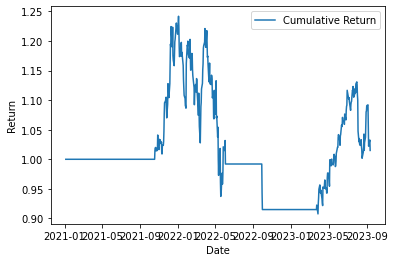

In [458]:
#plt.figure(dpi=200)
plt.plot(data.index, data['Cumulative_Return'], label='Cumulative Return')
plt.xlabel('Date') 
plt.ylabel('Return') 
plt.legend() 
plt.show()

In [459]:
print(data.iloc[-1:])

                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2023-09-12  179.490005  180.130005  174.820007  176.300003  176.300003   

              Volume    SMA_50    SMA_200  50_day_EMA  200_day_EMA  Signal  \
Date                                                                         
2023-09-12  90370200  185.7326  164.33165  182.530252   170.719079       1   

            Daily_Return  Strategy_Return  Cumulative_Return  
Date                                                          
2023-09-12     -0.017061        -0.017061           1.014952  


In [460]:
#import requests

#country = 'United States'
#api_url = 'https://api.api-ninjas.com/v1/inflation?country={}'.format(country)
#response = requests.get(api_url, headers={'X-Api-Key': 'NeWT6x6xXA9FJ4soDn/foA==4csIvbtX3KSIvtMB'})
#if response.status_code == requests.codes.ok:
#    print(response.text)
#else:
#    print("Error:", response.status_code, response.text)

In [461]:
#cpi_items_df = cpi.series.get(seasonally_adjusted=False).to_dataframe()

In [462]:
#cpi_items_df = cpi_items_df[cpi_items_df['period_type']=='monthly']
#plt.plot(data.index, data['Close'], label='AAPL Price') 
#plt.xlabel('Date')
#plt.legend() 
#plt.show()
#cpi_items_df['date'] = pd.to_datetime(cpi_items_df['date'])
#cpi_items_df = cpi_items_df.set_index('date')

In [463]:
#fig = plt.figure(dpi=200)
#cpi_items_df['value'].loc['2015':'2023'].plot()
#plt.xlabel('Date')
#plt.ylabel('CPI Value')